In [1]:
from PIL import Image
import torch
from torchvision import transforms

# List of paths to your grayscale PNGs
image_paths = ["00000001_000.png", "00000001_000.png"]

# Transform: ensure grayscale and convert to tensor (0–1 range)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load and transform each image
tensors = []
for path in image_paths:
    img = Image.open(path).convert('L')  # Convert to 8-bit grayscale
    tensor = transform(img)  # Tensor with shape [1, H, W], values in [0, 1]
    tensors.append(tensor)


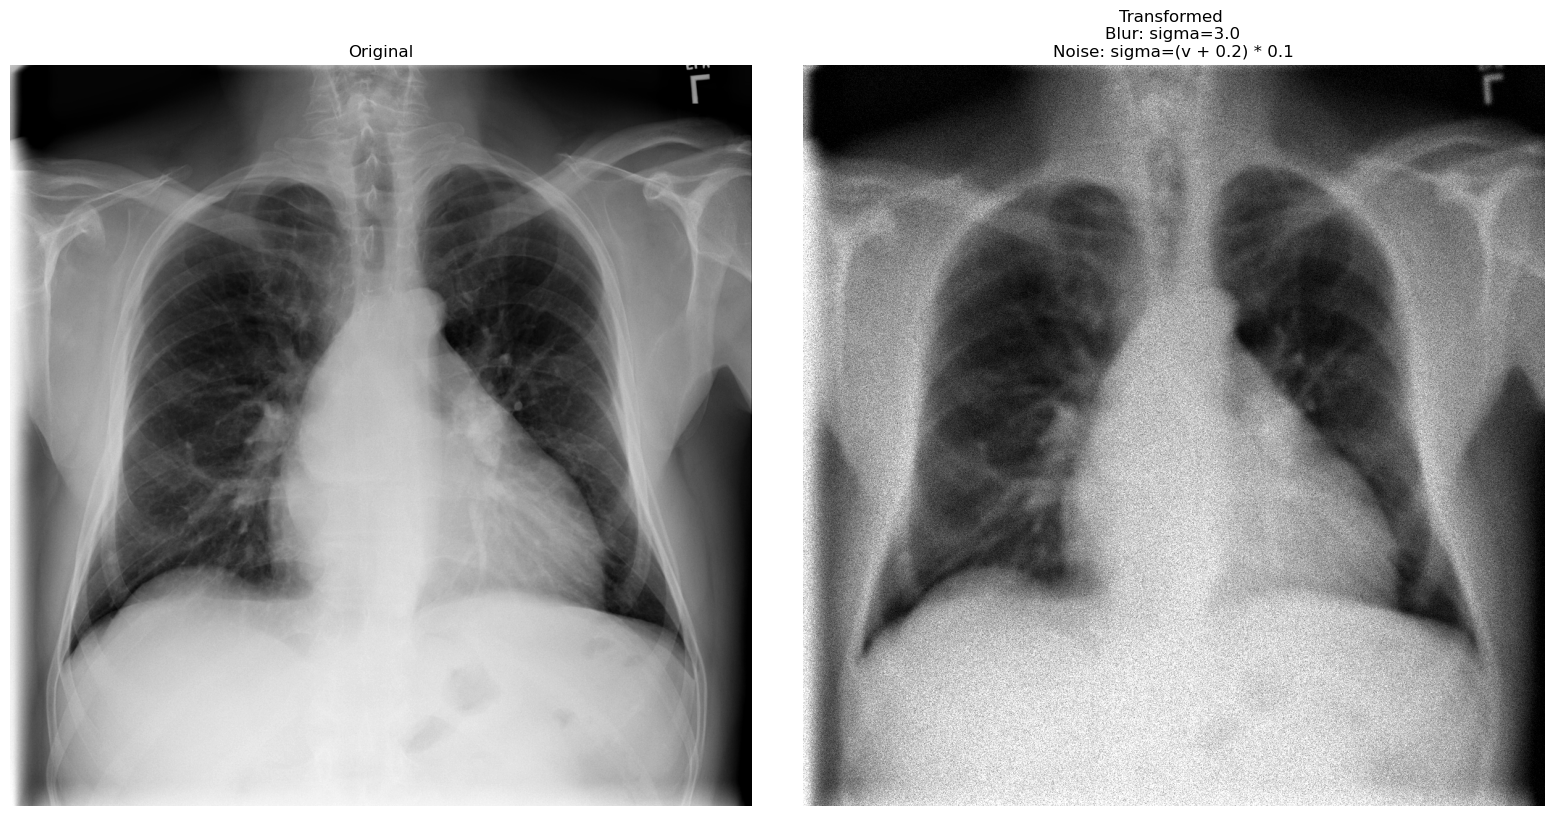

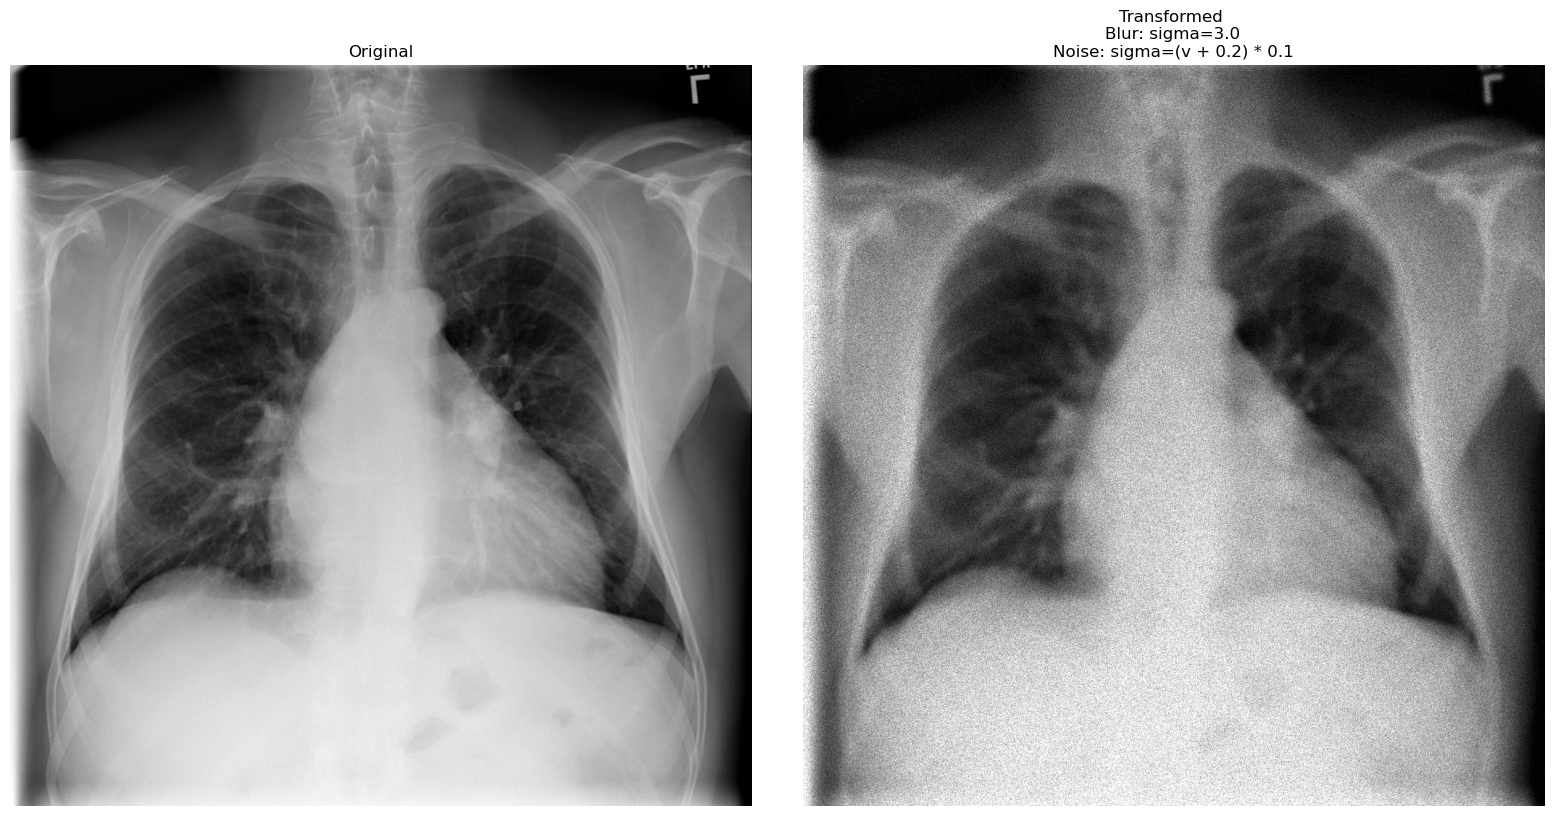

In [44]:
import matplotlib.pyplot as plt

from torchvision.transforms import GaussianBlur

# NOISE PARAMETERS
NOISE_STD_CONST = 0.2
NOISE_STD_FACTOR = 0.1
BLUR_SIGMA = 3.0


BLUR_KERNEL_SIZE = (int) (BLUR_SIGMA * 8)
if BLUR_KERNEL_SIZE % 2 == 0:
    BLUR_KERNEL_SIZE += 1

# Placeholder transformation function
def transform_tensor(image):
    # gaussian blur - to undo sharpening
    image = GaussianBlur(BLUR_KERNEL_SIZE, BLUR_SIGMA)(image)
    # noise - gaussian noise, based on signal
    image = torch.normal(image, std= (image + NOISE_STD_CONST)* NOISE_STD_FACTOR)
    return image.clamp(0,1)



crop_boxes = [
    (10, 10, 50, 50),
    (60, 60, 30, 30),
    (20, 80, 40, 40)
]

# Visualize each input and its transformed output
for i, tensor in enumerate(tensors):
    transformed = transform_tensor(tensor)

    # Convert tensors to NumPy arrays for plotting
    original_img = tensor.squeeze().numpy()
    transformed_img = transformed.squeeze().numpy()

    # Plot side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')

    axes[1].imshow(transformed_img, cmap='gray')
    axes[1].set_title(f"Transformed \nBlur: sigma={BLUR_SIGMA}\nNoise: sigma=(v + {NOISE_STD_CONST}) * {NOISE_STD_FACTOR}")
    axes[1].axis('off')

    plt.tight_layout()
    if i == 0:
        plt.savefig("output.png")
    plt.show()

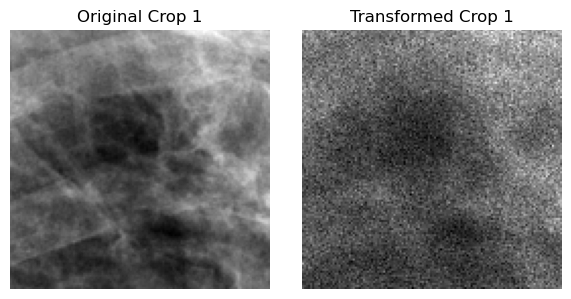

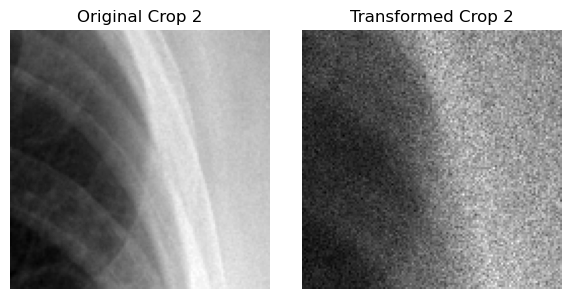

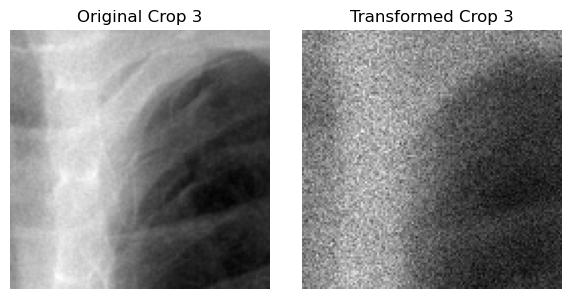

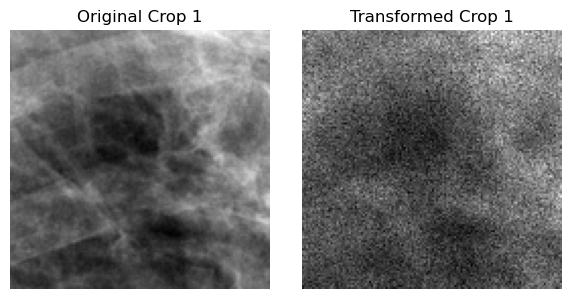

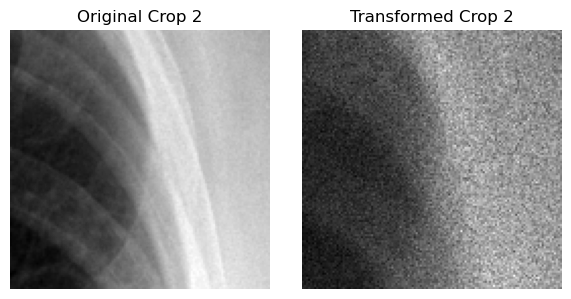

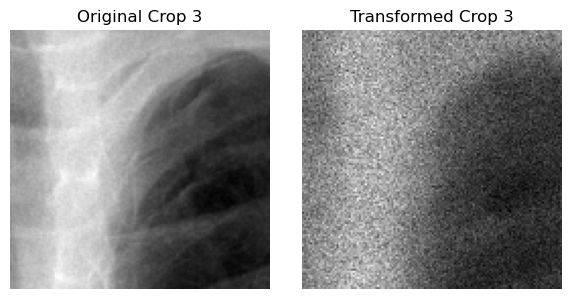

In [45]:
# Example list of crops per image: (x, y, width, height)
X = 128
crop_boxes = [
    (256, 256, X, X),
    (750, 256, X, X),
    (512, 128, X, X),
]

for tensor in tensors:
    transformed = transform_tensor(tensor)

    for idx, (x, y, w, h) in enumerate(crop_boxes):
        # Extract crop from original and transformed tensors
        crop_orig = tensor[:, y:y+h, x:x+w].squeeze(0).numpy()
        crop_trans = transformed[:, y:y+h, x:x+w].squeeze(0).numpy()

        # Plot side-by-side: original vs transformed
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))
        axes[0].imshow(crop_orig, cmap='gray')
        axes[0].set_title(f"Original Crop {idx+1}")
        axes[0].axis('off')

        axes[1].imshow(crop_trans, cmap='gray')
        axes[1].set_title(f"Transformed Crop {idx+1}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()